In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = sm.datasets.get_rdataset("AirPassengers", "datasets").data

In [3]:
data.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    144 non-null    float64
 1   value   144 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [5]:
series = data["value"]

In [6]:
series

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: value, Length: 144, dtype: int64

In [8]:
result = seasonal_decompose(series, model="additive")

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

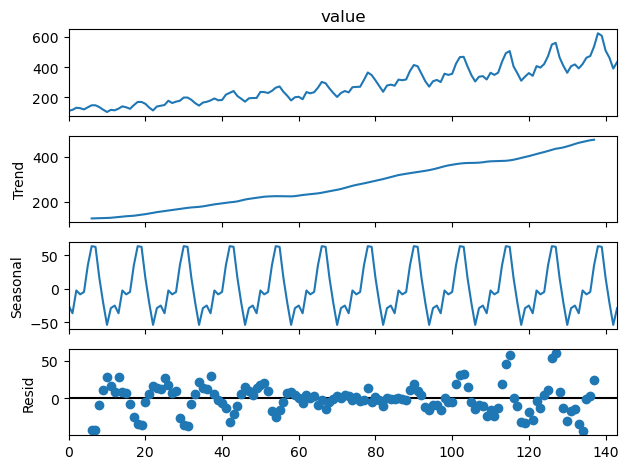

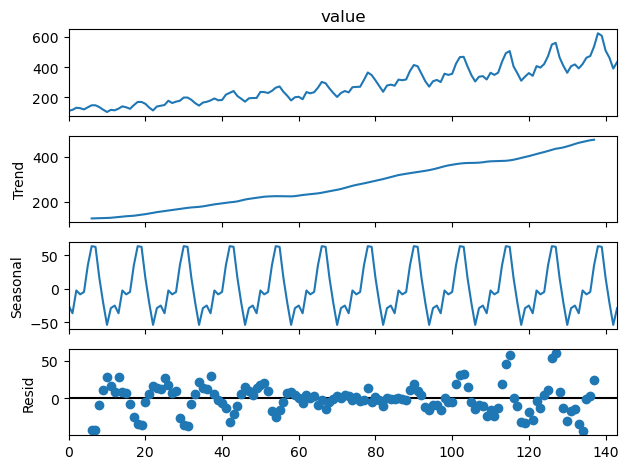

In [9]:
result.plot()

In [10]:
import seaborn as sns

<Axes: ylabel='value'>

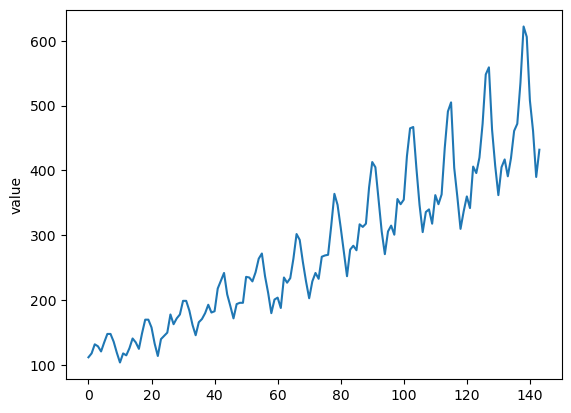

In [11]:
sns.lineplot(series)

In [13]:
result = seasonal_decompose(series, model="multiplicative", period=12)

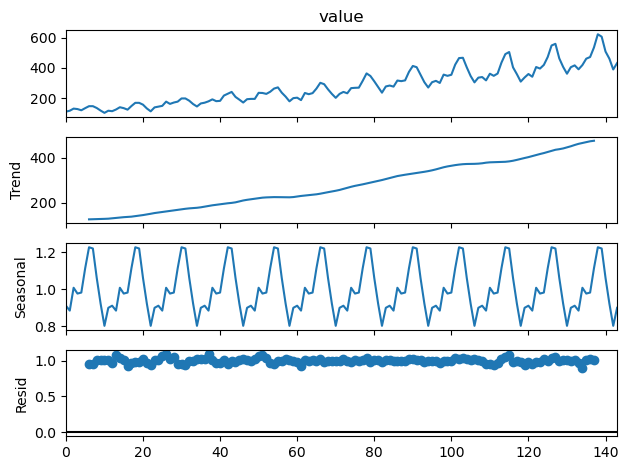

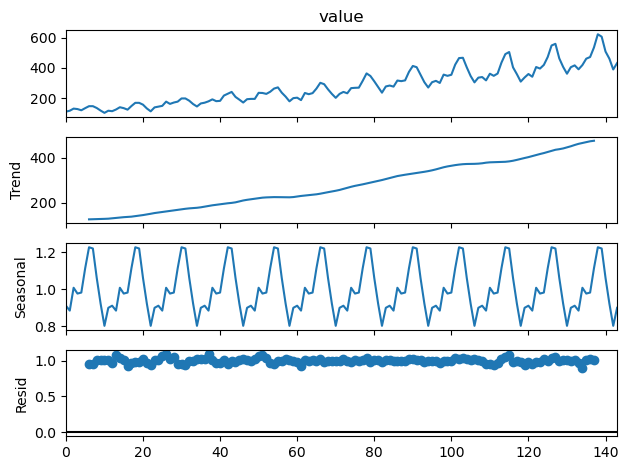

In [14]:
result.plot()

In [15]:
def read_dat_file(filepath):
    """
    Reads eriedata.dat file and returns a pandas time series.
    
    Assumes the file has two columns: date and value,
    or if no header, that it needs manual parsing.
    """
    try:
        # Try reading it as a simple CSV
        df = pd.read_csv(filepath, delim_whitespace=True, header=None)
        return pd.Series(df.values.ravel())
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

In [16]:
df = read_dat_file("beerprod.dat")

/tmp/ipykernel_47609/1676074845.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filepath, delim_whitespace=True, header=None)


In [17]:
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 72 entries, 0 to 71
Series name: None
Non-Null Count  Dtype  
--------------  -----  
72 non-null     float64
dtypes: float64(1)
memory usage: 708.0 bytes


In [18]:
df.head()

0    284.4
1    212.8
2    226.9
3    308.4
4    262.0
dtype: float64

<Axes: >

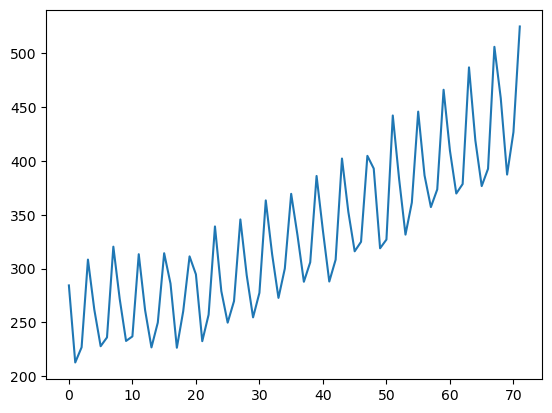

In [19]:
sns.lineplot(df)

In [20]:
decomp_beer = seasonal_decompose(df, model="additive", period = 4)

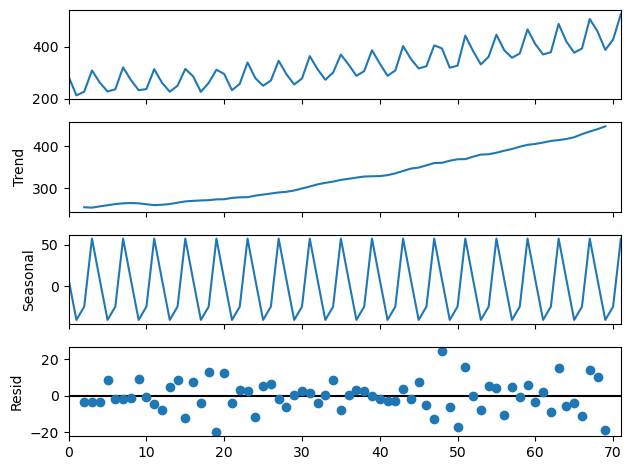

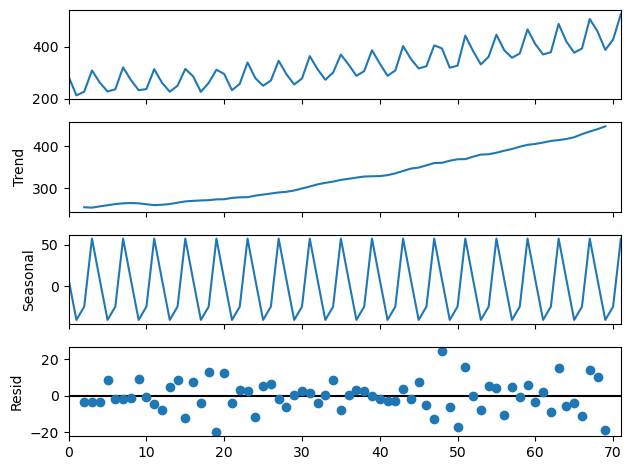

In [21]:
decomp_beer.plot()

In [23]:
dir(decomp_beer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

In [25]:
tr = decomp_beer.trend

In [26]:
seasonal = decomp_beer.seasonal
residual = decomp_beer.resid

<Axes: ylabel='trend'>

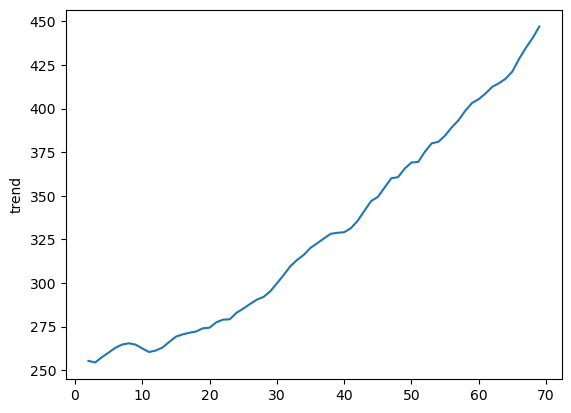

In [28]:
sns.lineplot(tr)

<Axes: ylabel='seasonal'>

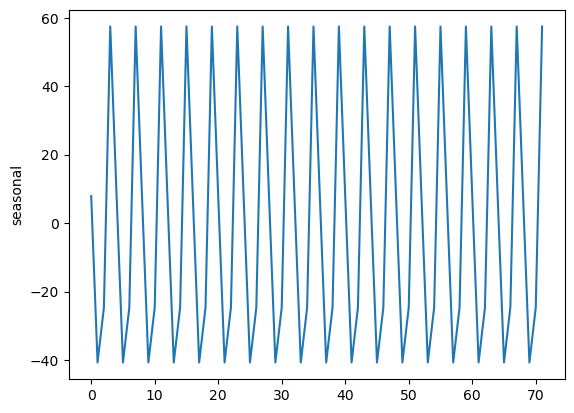

In [29]:
sns.lineplot(seasonal)

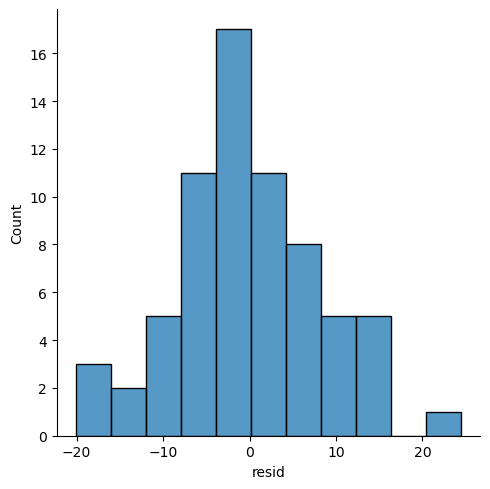

In [32]:
sns.displot(residual)